In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 30)
    fig.set_size_inches(40, 7)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = float(features[i][1])
        ax.set_title(f"{label:.3f}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id + 1}\n")
    print("Top-k tokens w.r.t. average attention score:")
    pair = results[concept_id]
    token_attn = [(t, a) for t, a, _ in pair["concept"]]
    for idx, (t, a) in enumerate(token_attn):
        print(f"\t{idx + 1}. {t}: {a:.4f}", sep=" ")
    print("\nTop-n images with largest absolute values of logits:")
    plot_instances(pair["feature"])
    print(100 * "-")

Concept #1

Top-k tokens w.r.t. average attention score:
	1. red: 0.8317
	2. four: 0.8052
	3. blue: 0.2270
	4. angle: 0.1249
	5. three: 0.1180
	6. round: 0.1123
	7. green: 0.0514
	8. shape: 0.0433
	9. canvas: 0.0365
	10. this: 0.0352

Top-n images with largest absolute values of logits:


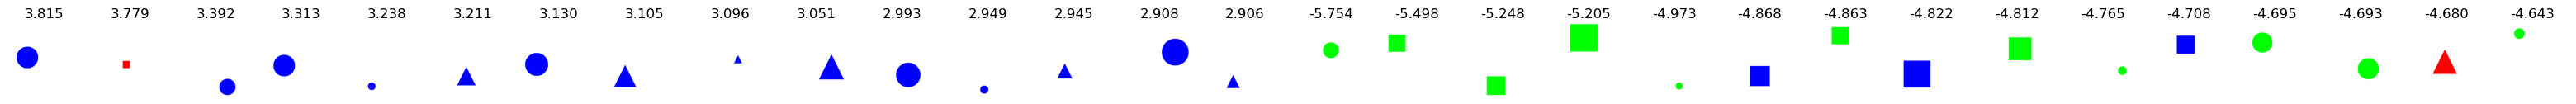

----------------------------------------------------------------------------------------------------
Concept #2

Top-k tokens w.r.t. average attention score:
	1. blue: 0.7192
	2. three: 0.2983
	3. green: 0.1773
	4. blank: 0.1361
	5. white: 0.1351
	6. this: 0.0743
	7. left: 0.0687
	8. rotate: 0.0646
	9. angle: 0.0569
	10. round: 0.0555

Top-n images with largest absolute values of logits:


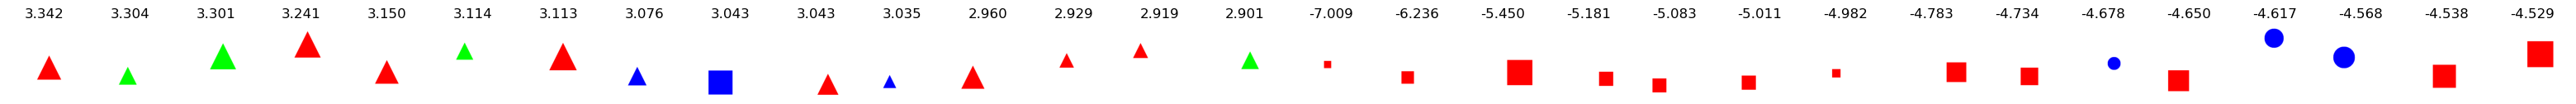

----------------------------------------------------------------------------------------------------
Concept #3

Top-k tokens w.r.t. average attention score:
	1. three: 0.6206
	2. green: 0.4826
	3. round: 0.2853
	4. red: 0.2431
	5. is: 0.1585
	6. color: 0.1381
	7. blue: 0.1027
	8. four: 0.0564
	9. shape: 0.0412
	10. has: 0.0376

Top-n images with largest absolute values of logits:


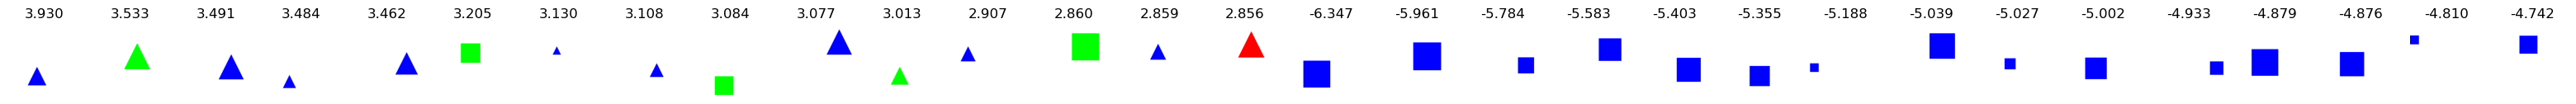

----------------------------------------------------------------------------------------------------
Concept #4

Top-k tokens w.r.t. average attention score:
	1. four: 0.9716
	2. green: 0.4243
	3. round: 0.2541
	4. three: 0.1899
	5. this: 0.0852
	6. blue: 0.0821
	7. left: 0.0685
	8. red: 0.0574
	9. is: 0.0443
	10. canvas: 0.0424

Top-n images with largest absolute values of logits:


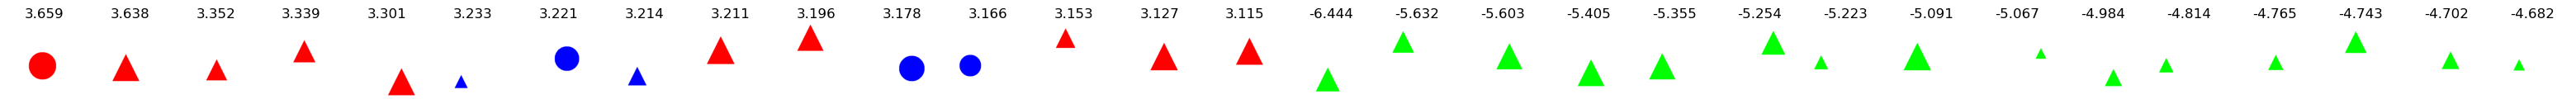

----------------------------------------------------------------------------------------------------
Concept #5

Top-k tokens w.r.t. average attention score:
	1. four: 0.6007
	2. green: 0.5229
	3. color: 0.3394
	4. red: 0.2632
	5. blue: 0.1369
	6. three: 0.0847
	7. round: 0.0425
	8. angle: 0.0324
	9. has: 0.0260
	10. right: 0.0185

Top-n images with largest absolute values of logits:


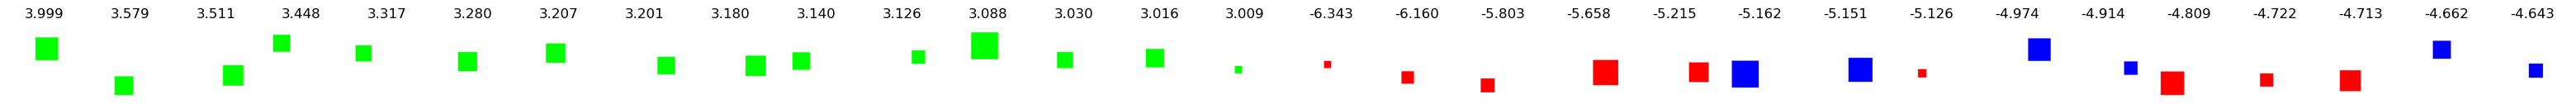

----------------------------------------------------------------------------------------------------
Concept #6

Top-k tokens w.r.t. average attention score:
	1. blue: 0.7986
	2. four: 0.4679
	3. green: 0.2815
	4. color: 0.1291
	5. is: 0.0900
	6. round: 0.0768
	7. three: 0.0738
	8. angle: 0.0724
	9. left: 0.0428
	10. right: 0.0408

Top-n images with largest absolute values of logits:


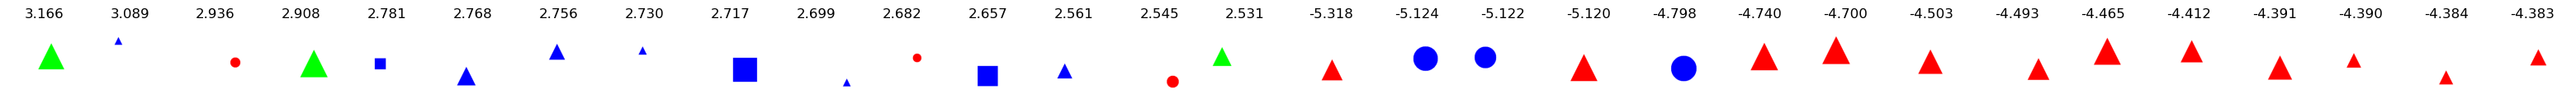

----------------------------------------------------------------------------------------------------
Concept #7

Top-k tokens w.r.t. average attention score:
	1. red: 0.9101
	2. blue: 0.3240
	3. four: 0.2052
	4. green: 0.1221
	5. angle: 0.1182
	6. shape: 0.1032
	7. rotate: 0.0714
	8. has: 0.0650
	9. is: 0.0567
	10. canvas: 0.0403

Top-n images with largest absolute values of logits:


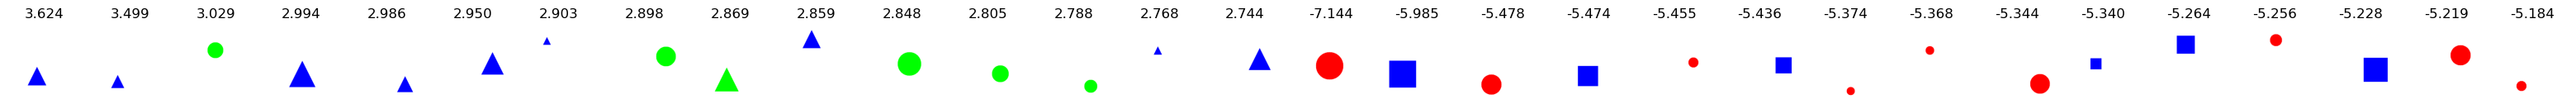

----------------------------------------------------------------------------------------------------
Concept #8

Top-k tokens w.r.t. average attention score:
	1. green: 0.7085
	2. red: 0.4400
	3. four: 0.3524
	4. round: 0.1883
	5. color: 0.1025
	6. three: 0.0981
	7. angle: 0.0875
	8. this: 0.0596
	9. blue: 0.0433
	10. left: 0.0333

Top-n images with largest absolute values of logits:


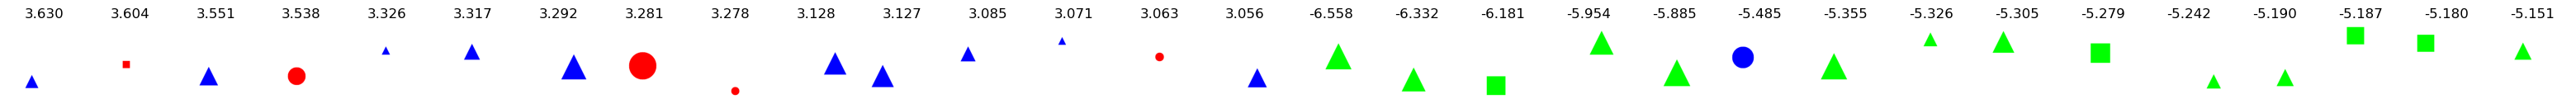

----------------------------------------------------------------------------------------------------
Concept #9

Top-k tokens w.r.t. average attention score:
	1. red: 0.7032
	2. blue: 0.4204
	3. four: 0.3318
	4. round: 0.1465
	5. angle: 0.1421
	6. green: 0.1373
	7. color: 0.1107
	8. three: 0.0538
	9. is: 0.0460
	10. this: 0.0427

Top-n images with largest absolute values of logits:


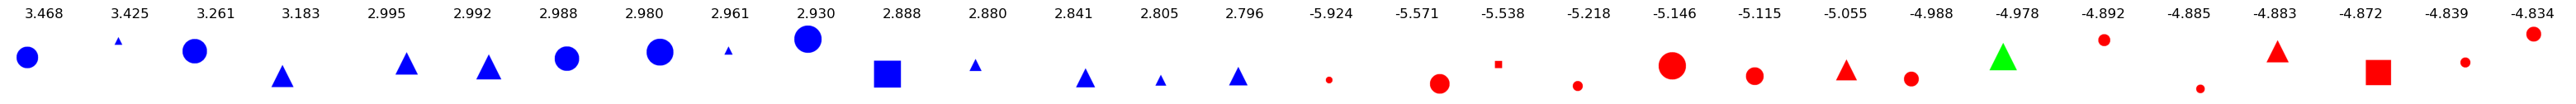

----------------------------------------------------------------------------------------------------
Concept #10

Top-k tokens w.r.t. average attention score:
	1. four: 0.5983
	2. blue: 0.4138
	3. green: 0.2782
	4. round: 0.2359
	5. three: 0.1572
	6. is: 0.1446
	7. color: 0.0930
	8. red: 0.0602
	9. left: 0.0561
	10. up: 0.0504

Top-n images with largest absolute values of logits:


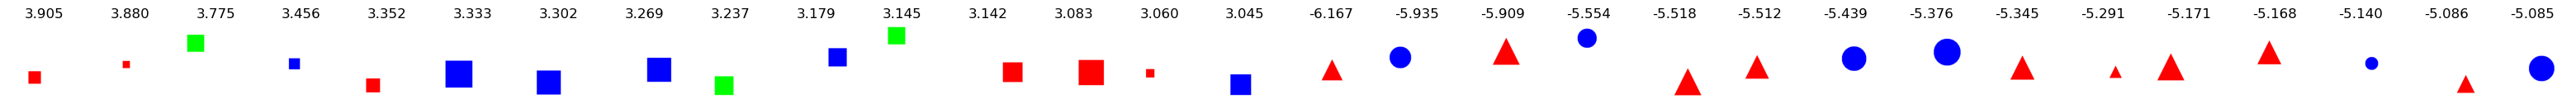

----------------------------------------------------------------------------------------------------


In [5]:
for i in range(10):
    visualize_concept(i)